# Object Detector - GRIP - Computer Vision and IOT - Task 1

## Author : Hritaban Ghosh

#### Note: The video used is taken from https://www.videvo.net/video/busy-times-square-at-night/5284/
#### Note: The image used is taken from https://www.peta.org/wp-content/uploads/2015/03/David-Williams-Man-with-Beard-Walking-Cat-e1426092041823.jpg

### Step 1: Import the Libraries

In [1]:
# In order to install opencv, in command line execute "pip install opencv-python"
import cv2 

In [2]:
# In order to install matplotlib, in comman line execute "pip install matplotlib"
import matplotlib.pyplot as plt

### Step 2: Download the MobileNet-SSD v3 Model

Go to https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API and download the weights and config file for the MobileNet-SSD v3 Model.

(OR)

You can directly download them using the links below:
weights : http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz
config : https://gist.github.com/dkurt/54a8e8b51beb3bd3f770b79e56927bd7/archive/2a20064a9d33b893dd95d2567da126d0ecd03e85.zip

Extract the files into your working directory.

Then in Folder ssd_mobilenet_v3_large_coco_2020_01_14 go to frozen_inference_graph.pb and copy it to your working directory.

Similarly from Folder 54a8e8b51beb3bd3f770b79e56927bd7-2a20064a9d33b893dd95d2567da126d0ecd03e85 go to ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt and copy it to your working directory.

### Step 3: Load the files

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

### Step 4: Load the Tensorflow pre-trained Model

In [4]:
# Load the Deep Neural Network Detection Model
model = cv2.dnn_DetectionModel(frozen_model, config_file)

### Step 5: Load the coco names

Go to https://github.com/pjreddie/darknet/blob/master/data/coco.names and then copy all the labels, put them in a text file and then save it in your working directory.

We need the labels to cross check the results later on.

In [5]:
# Create an empty list of labels
class_Labels = [] 

# Load the file containing the label names
file_name = 'Labels.txt'

# Open the file and add the names of the labels to the list
with open(file_name, 'rt') as file:
    class_Labels = file.read().rstrip('\n').split('\n')

In [6]:
# Print the list of labels
print(class_Labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
# Print the number of classes
print(len(class_Labels))

80


### Step 6: Read an Image

In [8]:
img = cv2.imread('Man_With_Car.jpg')

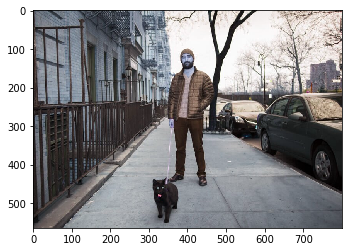

In [9]:
plt.imshow(img) # Note: By default opencv uses BGR format.

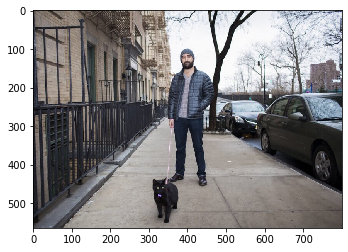

In [10]:
# In order to use RGB format use cv2.cvtColor
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### Step 6: Set up the model in accordance with the configuration file

In [11]:
# In the configuration file input size is defined to be 320 by 320.
model.setInputSize(320, 320)

# 255 is the gray level for white.
model.setInputScale(1.0/127.5) # 255/2 = 127.5

# Mobilenet takes input from [-1, 1], this is why we have put the mean to be 127.5
model.setInputMean(127.5)

# As opencv by default uses BGR, we wan to swap R and B for all images.
model.setInputSwapRB(True)

<dnn_Model 0000020E12B5F410>

### Step 7: Detect objects in the image using the model

In [12]:
class_Index, confidence, bbox = model.detect(img, confThreshold = 0.6)

In [13]:
print(class_Index, "\n\n" , confidence, "\n\n" , bbox)

[[1]
 [3]
 [3]] 

 [[0.7109171 ]
 [0.7047861 ]
 [0.60099655]] 

 [[349 105 113 350]
 [570 213 228 249]
 [485 227 128 104]]


### Step 8: Add bounding boxes to the image

In [14]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
i = 0
color = [(0,255,0),(255,0,0),(0,0,255),(255,255,0),(0,255,255),(255,0,255)]
if len(class_Index)!=0 :
    for class_Ind, conf, boxes in zip(class_Index.flatten(), confidence.flatten(), bbox):
        cv2.rectangle(img, boxes, color[i%6], thickness = 7)
        cv2.putText(img, class_Labels[class_Ind-1], (boxes[0]+10,boxes[1]+40), font, fontScale=font_scale, color = color[i%6], thickness = 5)
        i += 1

In [15]:
img.shape

(564, 800, 3)

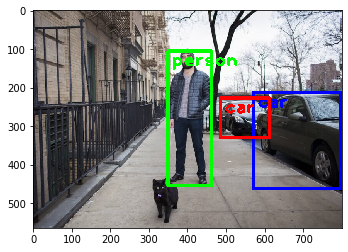

In [16]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### Step 9: Add bounding boxes to a video

In [17]:
# Using opencv to load the video
# Fow webcam use cv2.VideoCapture(1)
video = cv2.VideoCapture("NYC_TimeSquare.mp4")

# Check if the video is opened correctly
if not video.isOpened():
    video = cv2.VideoCapture(0)
if not video.isOpened():
    raise IOError("Cannot open video")

while True:
    ret, frame = video.read()
    
    class_Index, confidence, bbox = model.detect(frame, confThreshold = 0.6)

    i = 0
    if (len(class_Index)!=0):
        print(class_Index)
        for class_Ind, conf, boxes in zip(class_Index.flatten(), confidence.flatten(), bbox):
            if class_Ind <= 80 :
                cv2.rectangle(frame, boxes, color[i%6], thickness = 10)
                cv2.putText(frame, class_Labels[class_Ind-1], (boxes[0]+10,boxes[1]+40), font, fontScale=font_scale, color = color[i%6], thickness = 10)
                i += 1
            
    cv2.imshow('Object Detection Video', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
video.release()
cv2.destroyAllWindows()